## Problem 2 Multi-Layer Perceptrons (MLP)

In [2]:
# import some torch libraries
!pip install torchinfo
import torch
import torch.nn as nn
from torchinfo import summary

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

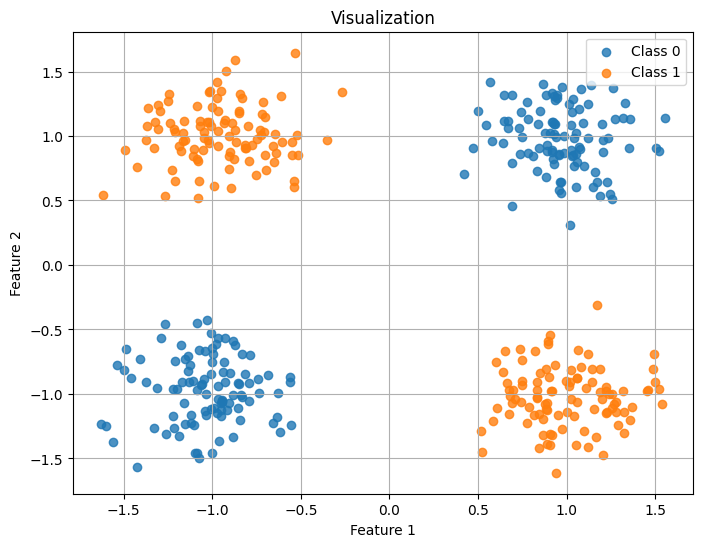

In [3]:
data = np.load('hw1_p2.npy')
# Visualization
X = data[:, :2]
y = data[:, 2]


plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], alpha=0.8, label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], alpha=0.8, label='Class 1')
plt.title('Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

patterns = torch.tensor(X).float()
labels = torch.tensor(y).float()

1.  What is the smallest MLP that can solve this problem? Provide your architecture (draw your network), the weights, biases, and activations you used.

The smallest MLP can be:
  - two input units
  - two hidden units
  - one output units

  Architecture should be [2 2 1].

2. Code your model, and train it on the provided data (using GD). You can use the MLP code in Lecture 3. Repeat your training 10 times (with different network initializations), and report a histogram of the network’s training accuracy on these ten runs. Was your network able to find the solution in every single run? If not, what is preventing your network from finding the right solution?

In [4]:
class MLP(nn.Module):
    def __init__(self, architecture=[2, 2, 1]):
        super(MLP, self).__init__()
        self.architecture = architecture

        # first linear layer
        self.linear1 = nn.Linear(architecture[0], architecture[1])

        # activations
        self.Sigmoid = nn.Sigmoid()
        self.Relu = nn.ReLU()

        # second linear layer
        self.linear2 = nn.Linear(architecture[1], architecture[2])
        self.architecture = architecture

    def forward(self, f):
        assert f.shape[1] == self.architecture[0]

        x = self.Relu(self.linear1(f))
        y = self.Sigmoid(self.linear2(x))

        return y


In [5]:
def train(patterns, labels, arch):

  model = MLP(architecture = arch)

  epochs = 5000
  lr = 1e-2
  optim = torch.optim.SGD(model.parameters(), lr = lr)
  objective=nn.BCELoss()

  for epoch in range(epochs):
    output = model.forward(patterns)

    loss = objective(output[:,0], labels)

    loss.backward()
    optim.step()
    optim.zero_grad()

  return model

In [6]:
def calculate_accuracy(model, patterns, labels):

  predict = model(patterns)[:,0]
  predict[predict >= .5] = 1.
  predict[predict < .5] = 0.
  accuracy = (predict == labels).sum() / len(labels)

  return accuracy

In [11]:
model = MLP(architecture=[2, 2, 1])
print(summary(model, input_size=(len(labels),2)))

accuracy = []
for run in range(10):
  print('run #', run+1)
  model = train(patterns, labels, arch = [2, 2, 1])

  accuracy.append(calculate_accuracy(model, patterns, labels))

Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [400, 1]                  --
├─Linear: 1-1                            [400, 2]                  6
├─ReLU: 1-2                              [400, 2]                  --
├─Linear: 1-3                            [400, 1]                  3
├─Sigmoid: 1-4                           [400, 1]                  --
Total params: 9
Trainable params: 9
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
run # 1
run # 2
run # 3
run # 4
run # 5
run # 6
run # 7
run # 8
run # 9
run # 10


tensor(1.)


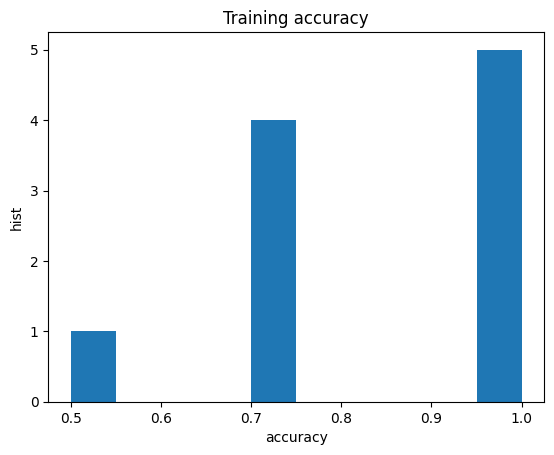

In [12]:
plt.figure()
plt.hist(accuracy)
plt.title('Training accuracy')
plt.xlabel('accuracy')
plt.ylabel('hist')
# print(max(accuracy))


Answer: My network is able to find the solution every single run. The performance of my model is quite good considering the maximum accuracy reaches 0.95.

3. Repeat the above experiment, however, this time increase the length of your hidden layer (e.g., to 10-100). Report your training accuracy histogram of the ten runs. Compare your results for the larger and smaller networks. Interpret your results.


In [13]:
model = MLP(architecture=[2, 10, 1])
print(summary(model, input_size=(len(labels),2)))

accuracy = []
for run in range(10):
  print('run #', run+1)
  model = train(patterns, labels, arch = [2, 10, 1])

  accuracy.append(calculate_accuracy(model, patterns, labels))

Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [400, 1]                  --
├─Linear: 1-1                            [400, 10]                 30
├─ReLU: 1-2                              [400, 10]                 --
├─Linear: 1-3                            [400, 1]                  11
├─Sigmoid: 1-4                           [400, 1]                  --
Total params: 41
Trainable params: 41
Non-trainable params: 0
Total mult-adds (M): 0.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.00
Estimated Total Size (MB): 0.04
run # 1
run # 2
run # 3
run # 4
run # 5
run # 6
run # 7
run # 8
run # 9
run # 10


Text(0, 0.5, 'hist')

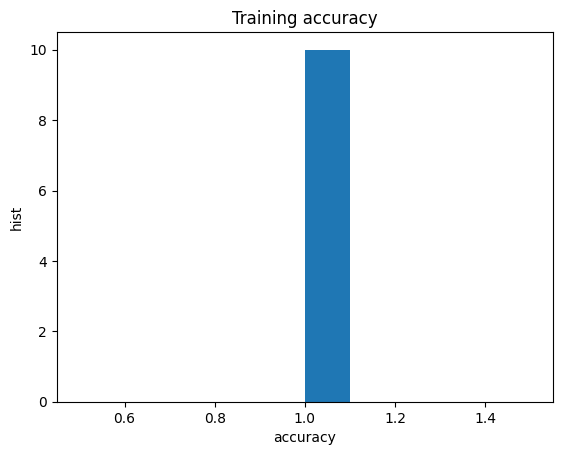

In [14]:
plt.figure()
plt.hist(accuracy)
plt.title('Training accuracy')
plt.xlabel('accuracy')
plt.ylabel('hist')

When changing the architecture to [2, 10, 1], every single run can find the solution. The wider the network is, the better it will do in the interpolation.